# Fréquence limite de quelques nombres irrationnels

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
#1) 
from mpmath import mp
N = 5*1e4
mp.dps = N  # set number of digits
num= str(mp.pi) #str(mp.phi)
Freq_list = []
for digit in range (0,10):
    j = 0
    for i in num:
        if i==str(digit):
            j +=1
    Freq_list.append(j/(N))    
    print(f'Fréquence de {digit}:', j/(N))

Fréquence de 0: 0.10066
Fréquence de 1: 0.10108
Fréquence de 2: 0.09734
Fréquence de 3: 0.09896
Fréquence de 4: 0.10022
Fréquence de 5: 0.10104
Fréquence de 6: 0.10036
Fréquence de 7: 0.09954
Fréquence de 8: 0.1006
Fréquence de 9: 0.1002


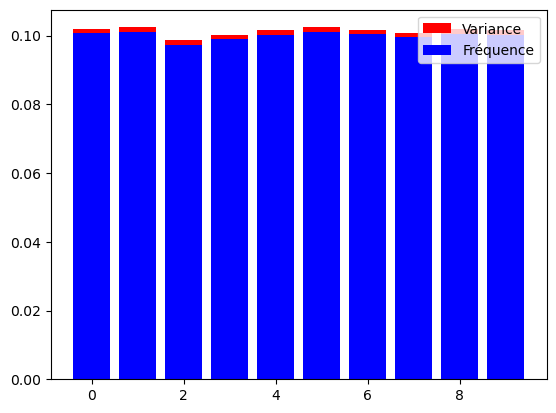

In [3]:
#2)
sigma_d = np.sqrt(np.array(Freq_list)*(1-np.array(Freq_list))/(N)) #On établit l'écart type symétrique dérivé de la variance
# binomiale
plt.bar([i for i in range (0,10)],Freq_list+sigma_d, color='r', label='Variance')
plt.bar([i for i in range (0,10)], Freq_list, color='b',label='Fréquence')

plt.legend();

In [4]:
#3)
def f_lin(d, alpha, beta):
    return alpha/10 + beta*d

x_data = np.arange(0,10)
y_data = Freq_list
popt, pcov = sp.optimize.curve_fit(f_lin, x_data, y_data) #On effectue le fitting
print('alpha_optimisé=', popt[0]);
print('beta_optimisé =', popt[1])

alpha_optimisé= 0.9976763650571489
beta_optimisé = 5.163634631133451e-05


In [5]:
#4) 
Var_alpha, Var_beta, Covar = pcov[0][0], pcov[1][1], pcov[0][1]
Corr = Covar/np.sqrt((Var_alpha * Var_beta))
print('Var(alpha) =', pcov[0][0])
print('Var(beta) =', pcov[1][1])
print('Cov(alpha,beta) =', pcov[0][1])
print('Corrélation :', Corr)

Var(alpha) = 4.927225641126211e-05
Var(beta) = 1.72884997131567e-08
Cov(alpha,beta) = -7.779825774143002e-07
Corrélation : -0.8429270526081631


In [6]:
#4) 
chi2_min = np.sum(((np.array(Freq_list) - f_lin(x_data, popt[0], popt[1]))/sigma_d)**2)
print('chi2_min =', chi2_min)

chi2_min = 6.4142845265049795


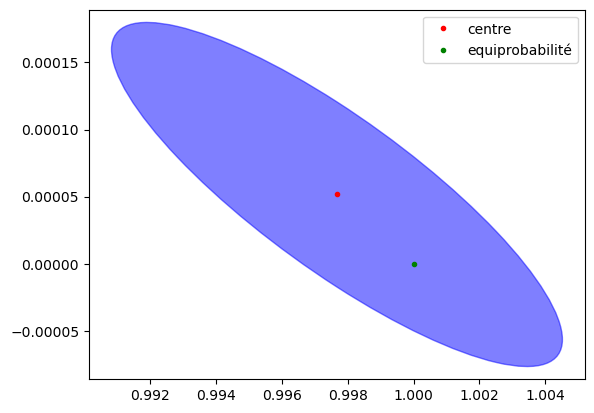

In [7]:
#5) #J'ai repris le code issu des TD pour retracer les ellipses
from matplotlib.patches import Ellipse
def plot_ellipse(center, covariance, chi2=0.95, **kwargs):
    """Draws an error ellipse for the given covariance matrix and chi^2 value.
    """

    # Scaling of error ellipse.
    scale = np.sqrt(chi2)

    def plot_patch(lambda_plus, lambda_minus, theta):
        """Draws error ellipse using a patch object."""
        ellipse = Ellipse(
            xy = center,
            width = 2 * scale * np.sqrt(lambda_plus),
            height = 2 * scale * np.sqrt(lambda_minus),
            angle = np.degrees(theta),
            **kwargs
        )
        plt.gca().add_patch(ellipse)

    sigma1_sq = covariance[0, 0]
    sigma2_sq = covariance[1, 1]
    cross_term = covariance[0, 1] + covariance[1, 0]

    # Apply analytical formulae.
    b = sigma1_sq + sigma2_sq
    delta = np.sqrt((sigma1_sq - sigma2_sq)**2 + cross_term**2)

    lambda_plus = (b + delta) / 2
    lambda_minus = (b - delta) / 2
    theta = np.arctan2(
        cross_term,
        sigma1_sq - sigma2_sq) / 2

        # Draw the patch object.
    plot_patch(
        lambda_plus,
        lambda_minus,
        theta)
    plt.plot(popt[0], popt[1],'.', color='r', label='centre')
    plt.plot(1,0,'.', color='g', label='equiprobabilité')
    
    
center = np.array((popt[0], popt[1]))
covariance = pcov

# Overlay plot using different methods.
plt.figure()
plot_ellipse(center, covariance,
    color="blue", alpha=0.5)
plt.axis()
plt.legend()
plt.show()

In [8]:
#5) 
chi2_0 = np.sum(((np.array(Freq_list) - f_lin(x_data, 1,0))/sigma_d)**2)
deltachi2_0 = chi2_0 - chi2_min
print(deltachi2_0)
print('p_value =', sp.stats.chi2.sf(deltachi2_0,2))
print('La distribution des fréquences observées dans les données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie')

0.13422223328736838
p_value = 0.9350912913579854
La distribution des fréquences observées dans les données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie


# La loi des nombre anormaux

## Premier chiffre des nombres de Fibonacci

In [9]:
#1)
def fibonacci2(n):
    fib = [1,1]
    for i in range (2,n):
        fib.append(fib[i-2]+fib[i-1])
    return fib
Fib_list = fibonacci2(5000)

N = 5000
Freq_digit =[]
for digit in range (1,10):
    count=0
    for n in Fib_list:
        if str(digit) == str(n)[0]:
                count +=1
    Freq_digit.append(count/N)            
    print(f'Fréquence de {digit}:', count/N)

Fréquence de 1: 0.301
Fréquence de 2: 0.1764
Fréquence de 3: 0.125
Fréquence de 4: 0.0966
Fréquence de 5: 0.0794
Fréquence de 6: 0.0666
Fréquence de 7: 0.058
Fréquence de 8: 0.0514
Fréquence de 9: 0.0456


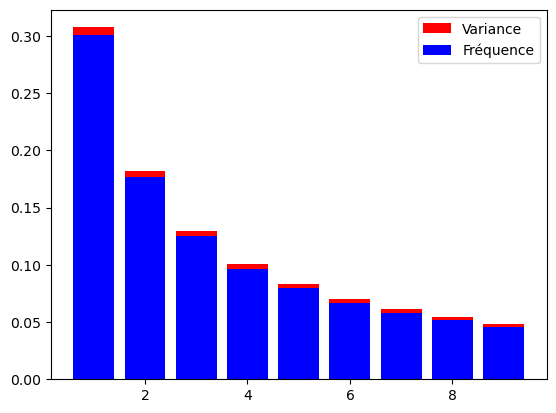

In [10]:
sigma_d = np.sqrt(np.array(Freq_digit)*(1-np.array(Freq_digit))/(N))
plt.bar([i for i in range (1,10)],sigma_d+Freq_digit, color='r', label='Variance')
plt.bar([i for i in range (1,10)], Freq_digit, color='b',label='Fréquence')

plt.legend();

In [11]:
def f_log(d, alpha, beta):
    return np.log10(np.abs(d+alpha)) - np.log10(np.abs(d+beta))

x_data = np.arange(1,10)
y_data = Freq_digit
popt, pcov = sp.optimize.curve_fit(f_log, x_data, y_data)
print('alpha_optimisé=', popt[0]);
print('beta_optimisé =', popt[1])

alpha_optimisé= 1.0001163656561485
beta_optimisé = -3.356152428007776e-05


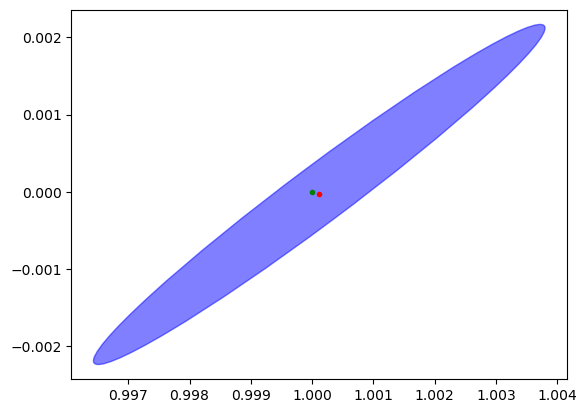

In [12]:
center = np.array((popt[0], popt[1]))
covariance = pcov

# Overlay plot using different methods.
plt.figure()
plot_ellipse(center, covariance,
    color="blue", alpha=0.5)
plt.axis()
#plt.plot(popt[1],popt[0], '*')
plt.show()

In [13]:
sigma_d = np.sqrt(np.array(Freq_digit)*(1-np.array(Freq_digit))/(N))
chi2_0 = np.sum(((np.array(Freq_digit) - f_log(x_data, 1,0))/sigma_d)**2)
chi2_min = np.sum(((np.array(Freq_digit) - f_log(x_data, popt[0], popt[1]))/sigma_d)**2)
deltachi2_0 = chi2_0 - chi2_min
print(deltachi2_0)
print('p_value =', sp.stats.chi2.sf(deltachi2_0,2))
print('La distribution des fréquences observées dans les données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie.' )

-0.00010116581381869674
p_value = 1.0
La distribution des fréquences observées dans les données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie.


## 2) Produit de variables aléatoires uniformément distribuées

In [14]:
def Zn(n, N):
    X = np.random.uniform(1, 10, size=(N,)) 
    Zn = X**n  
    # On prend le premier chiffre
    first_digits = np.array([int(str(abs(num))[0]) for num in Zn])

    return first_digits

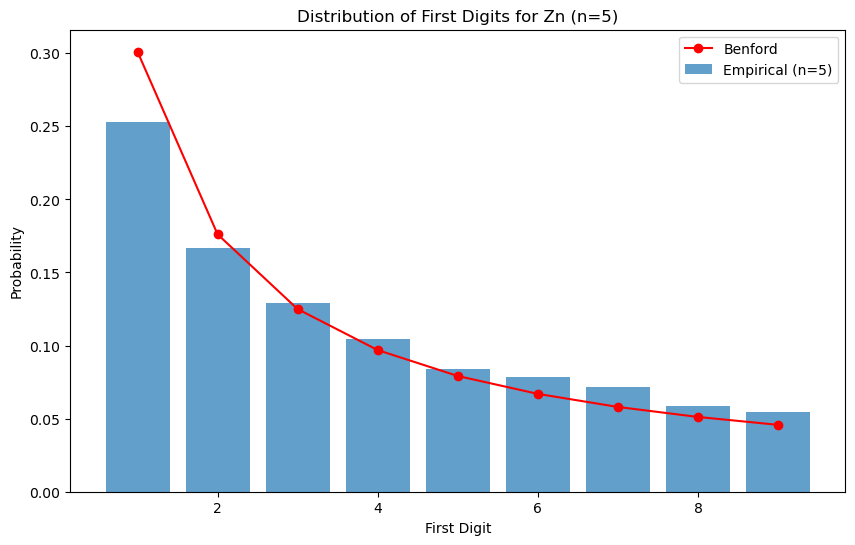

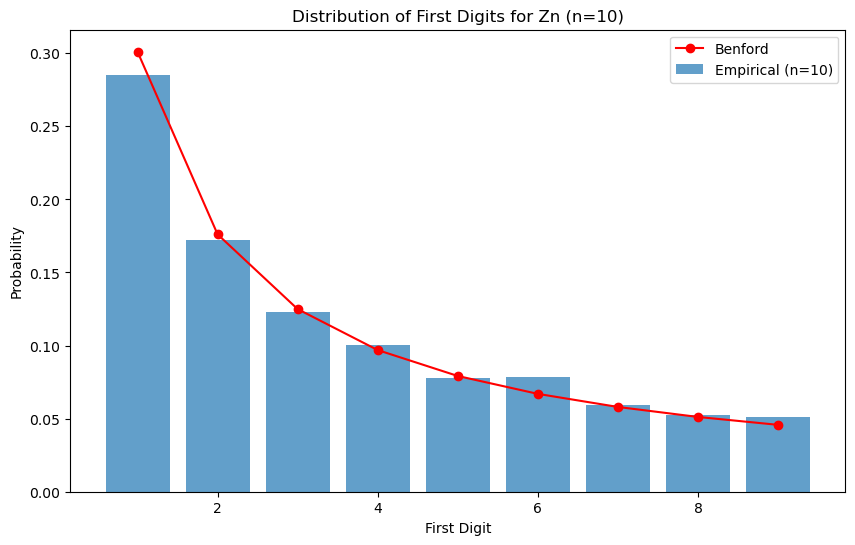

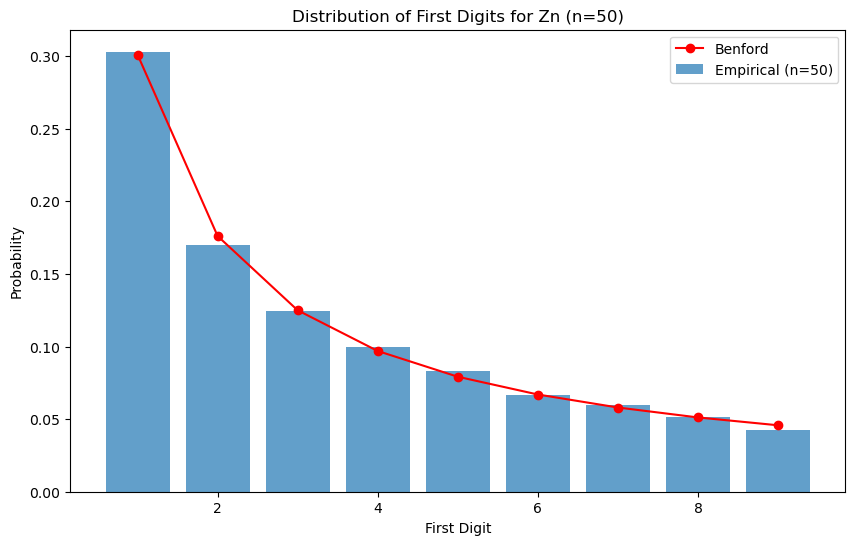

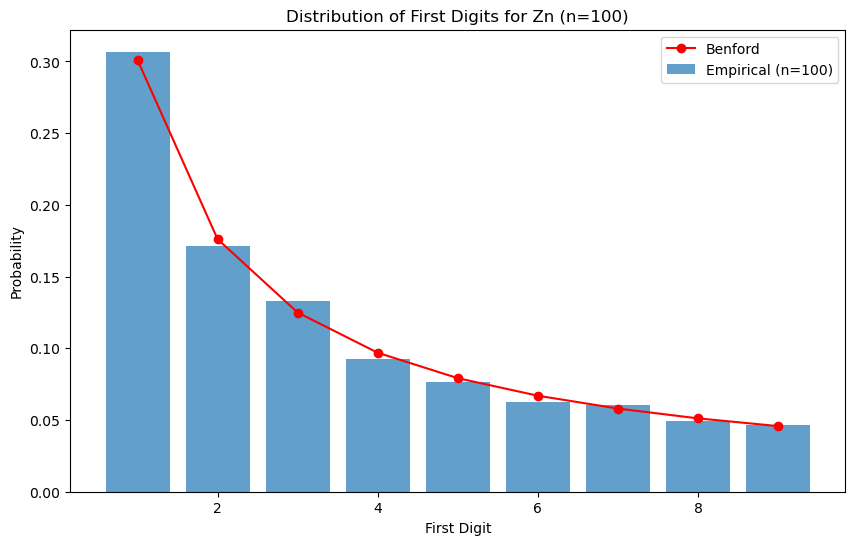

In [15]:
n_values = [5, 10, 50, 100]
#Distribution de Benford
def benford():
    d = np.arange(1, 10)
    benford_dist = np.log10(1 + 1 / d)
    benford_dist /= benford_dist.sum()  # Normaliser pour aoir une distribution de proba
    return benford_dist

for n in n_values:
    first_digits = Zn(n, N)

   # Distribution empirique du premier digit
    empirical_dist, bins = np.histogram(first_digits, bins=np.arange(1, 11),density =True) # "density = True" pour retourner
   # La valeur de la pdf aux bin, normalisée telle que l'intégrale égale 1.
    empirical_dist /= empirical_dist.sum()  #afin de normaliser

    benford_dist = benford()

    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), empirical_dist, label=f'Empirical (n={n})', alpha=0.7)
    plt.plot(range(1, 10), benford_dist, 'ro-', label='Benford')
    plt.title(f'Distribution of First Digits for Zn (n={n})')
    plt.xlabel('First Digit')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [16]:
Freq_digit2 = []
Z = Zn(300,N)
for digit in range (1,10):
    count=0
    for n in Z:
        if digit == n:
                count +=1
    Freq_digit2.append(count/N)            
    print(f'Fréquence de {digit}:', count/N)

Fréquence de 1: 0.3002
Fréquence de 2: 0.1682
Fréquence de 3: 0.1232
Fréquence de 4: 0.1028
Fréquence de 5: 0.0774
Fréquence de 6: 0.0714
Fréquence de 7: 0.062
Fréquence de 8: 0.0492
Fréquence de 9: 0.0456


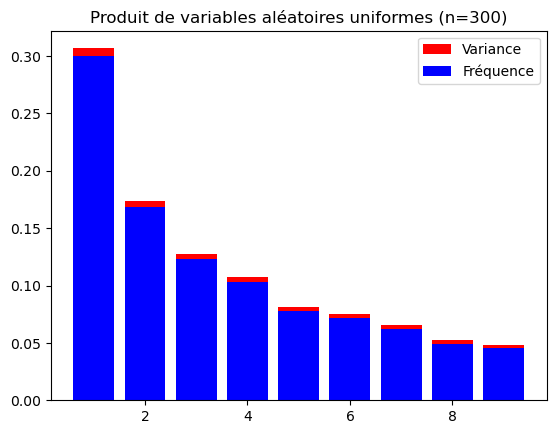

In [17]:
sigma_d = np.sqrt(np.array(Freq_digit2)*(1-np.array(Freq_digit2))/N)
plt.bar([i for i in range (1,10)],sigma_d+Freq_digit2, color='r', label='Variance')
plt.bar(np.arange(1,10), Freq_digit2, color='b',label='Fréquence')
plt.legend()
plt.title('Produit de variables aléatoires uniformes (n=300)');

In [18]:
x_data = np.arange(1,10)
y_data = Freq_digit2
popt, pcov = sp.optimize.curve_fit(f_log, x_data, y_data)
print('alpha_optimisé=', popt[0]);
print('beta_optimisé =', popt[1])

alpha_optimisé= 1.016976679354748
beta_optimisé = 0.014746265327118977


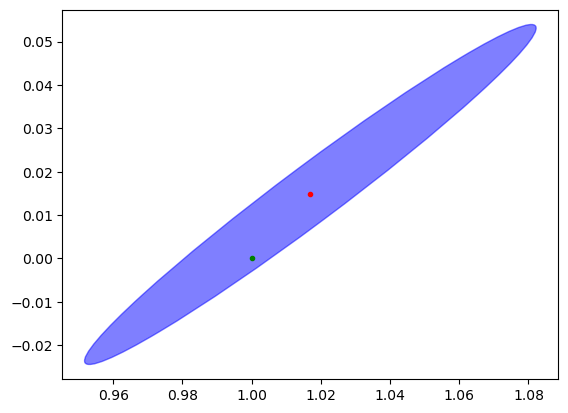

In [19]:
center = np.array((popt[0], popt[1]))
covariance = pcov

# Overlay plot using different methods.
plt.figure()
plot_ellipse(center, covariance,
    color="blue", alpha=0.5)
plt.axis()
#plt.plot(popt[1],popt[0], '*')
plt.show()

In [20]:
sigma_d = np.sqrt(np.array(Freq_digit2)*(1-np.array(Freq_digit2))/N)
chi2_0 = np.sum(((np.array(Freq_digit2) - f_log(x_data, 1,0))/sigma_d)**2)
chi2_min = np.sum(((np.array(Freq_digit2) - f_log(x_data, popt[0], popt[1]))/sigma_d)**2)
deltachi2_0 = chi2_0 - chi2_min
print(deltachi2_0)
print('p_value =', sp.stats.chi2.sf(deltachi2_0,2))
print('La distribution des fréquences observées dans vos données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie.')

0.29254713677473454
p_value = 0.8639213292890384
La distribution des fréquences observées dans vos données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie.


## 3) Quotient de variables aléatoires uniformément distribuées

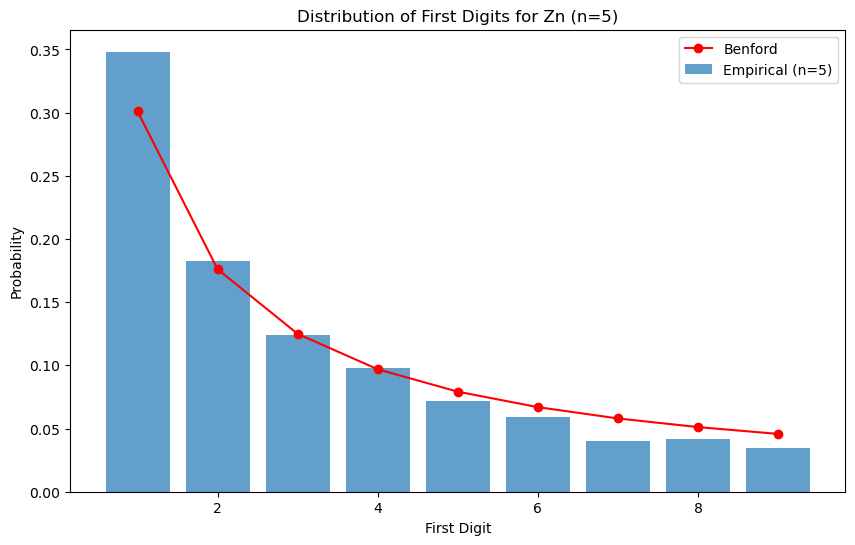

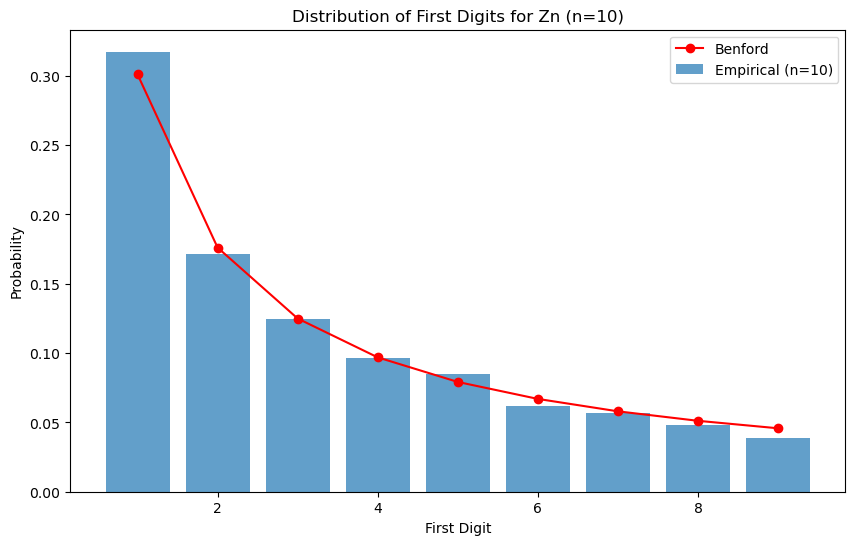

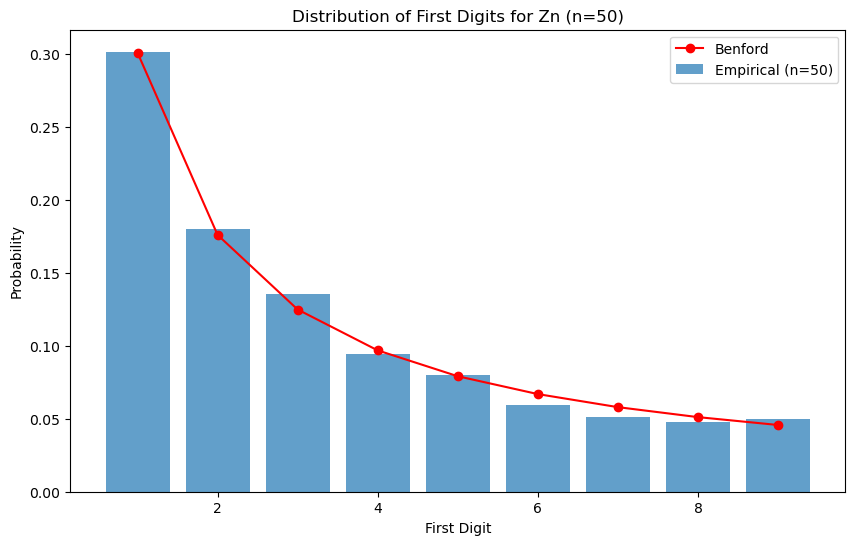

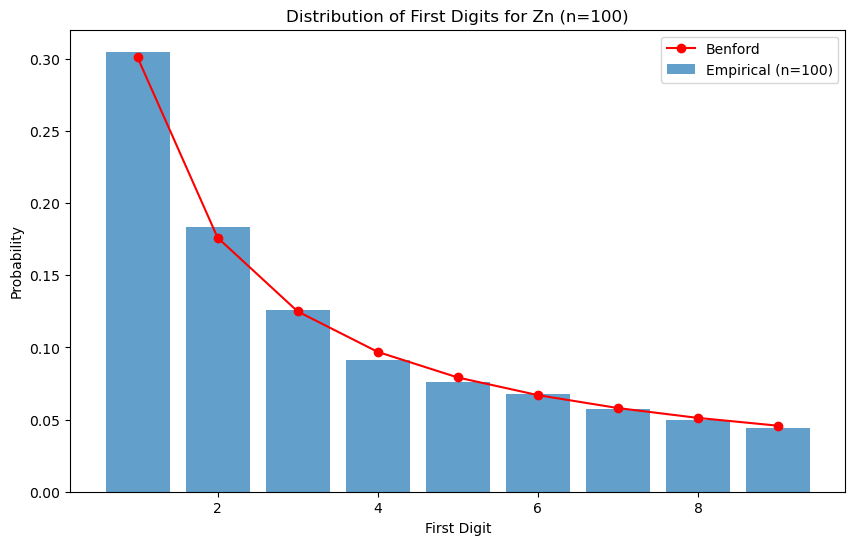

In [21]:
def Zn(n, N):
    X = np.random.uniform(1, 10, size=(N,)) 
    Y = np.random.uniform(1, 10, size=(N,))  

    Zn = (X / Y)**n  # Calculate Zn

    # On prend le premier chiffre
    first_digits = np.array([int(str(abs(num))[0]) for num in Zn])

    return first_digits

#Distribution de Benford
def benford():
    d = np.arange(1, 10)
    benford_dist = np.log10(1 + 1 / d)
    benford_dist /= benford_dist.sum()  # Normaliser pour aoir une distribution de proba
    return benford_dist


n_values = [5, 10, 50, 100]

for n in n_values:
    first_digits = Zn(n, N)

   # Distribution empirique du premier digit
    empirical_dist, bins = np.histogram(first_digits, bins=np.arange(1, 11),density =True) # "density = True" pour retourner
   # La valeur de la pdf aux bin, normalisée telle que l'intégrale égale 1.
    empirical_dist /= empirical_dist.sum()  #afin de normaliser

    benford_dist = benford()

    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, 10), empirical_dist, label=f'Empirical (n={n})', alpha=0.7)
    plt.plot(range(1, 10), benford_dist, 'ro-', label='Benford')
    plt.title(f'Distribution of First Digits for Zn (n={n})')
    plt.xlabel('First Digit')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

Fréquence de 1: 0.3
Fréquence de 2: 0.172
Fréquence de 3: 0.121
Fréquence de 4: 0.095
Fréquence de 5: 0.087
Fréquence de 6: 0.067
Fréquence de 7: 0.065
Fréquence de 8: 0.051
Fréquence de 9: 0.043


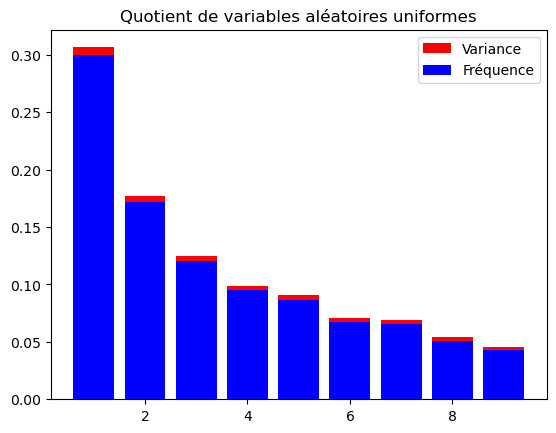

In [22]:
Freq_digit3 = []
Z = [i for i in Zn(200,N) if i!=0]
for digit in range(1,10):
    counter = 0 
    for i in Z:
        if i==digit:
            counter += 1
    Freq_digit3.append(counter/len(Z))
    print(f'Fréquence de {digit}:', np.round(counter/len(Z),3))

sigma_d = np.sqrt(np.array(Freq_digit3)*(1-np.array(Freq_digit3))/N)
plt.bar([i for i in range (1,10)],sigma_d+Freq_digit3, color='r', label='Variance')
plt.bar(np.arange(1,10), Freq_digit3, color='b',label='Fréquence')
plt.legend()
plt.title('Quotient de variables aléatoires uniformes');

In [23]:
#On réalise le fitting
x_data = np.arange(1,10)
y_data = Freq_digit3
popt, pcov = sp.optimize.curve_fit(f_log, x_data, y_data)
print('alpha_optimisé=', popt[0]);
print('beta_optimisé =', popt[1])

alpha_optimisé= 1.013163358192063
beta_optimisé = 0.012220987942867708


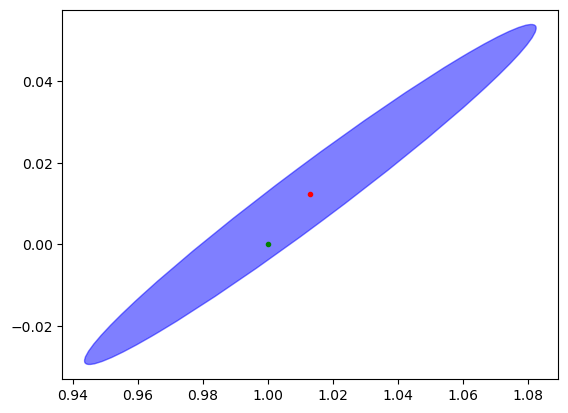

In [24]:
center = np.array((popt[0], popt[1]))
covariance = pcov

plt.figure()
plot_ellipse(center, covariance,
    color="blue", alpha=0.5)
plt.axis()
plt.show()

In [25]:
sigma_d = np.sqrt(np.array(Freq_digit3)*(1-np.array(Freq_digit3))/N)
chi2_0 = np.sum(((np.array(Freq_digit3) - f_log(x_data, 1,0))/sigma_d)**2)
chi2_min = np.sum(((np.array(Freq_digit3) - f_log(x_data, popt[0], popt[1]))/sigma_d)**2)
deltachi2_0 = chi2_0 - chi2_min
print(deltachi2_0)
print('p_value =', sp.stats.chi2.sf(deltachi2_0,2))
print('La distribution des fréquences observées dans les données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie.')

0.22401882752171254
p_value = 0.8940358412211367
La distribution des fréquences observées dans vos données est similaire à ce à quoi on s attendrait si l hypothèse nulle était vraie.
